In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

books = pd.read_parquet("Philosophy_books.parquet")
books

,title,author,genres,page_count,publish_date,rating,num_ratings,num_reviews,five_stars,four_stars,three_stars,two_stars,one_star
0,Meditations,Marcus Aurelius,"[Philosophy, Nonfiction, Classics, History, Se...",254,180-01-01,4.28,308318,17704,161521,91364,40883,10169,4381
1,The Republic,Plato,"[Philosophy, Classics, Nonfiction, Politics, H...",416,401-01-01,3.96,217269,6513,78476,74312,47602,12014,4865
2,Thus Spoke Zarathustra,Friedrich Nietzsche,"[Philosophy, Classics, Nonfiction, German Lite...",327,1883-01-01,4.07,166315,6355,70530,54072,28929,8670,4114
3,Beyond Good and Evil,Friedrich Nietzsche,"[Philosophy, Nonfiction, Classics, Psychology,...",240,1886-01-01,4.03,106840,3836,41463,37583,19828,5362,2604
4,Man’s Search for Meaning,Viktor E. Frankl,"[Nonfiction, Psychology, Philosophy, Self Help...",165,1946-01-01,4.37,811134,44991,453134,243500,88365,17671,8464
5,The Prince,Niccolò Machiavelli,"[Philosophy, Nonfiction, Politics, History, Po...",144,1513-01-01,3.84,365209,14799,109447,128846,94238,24839,7839
6,Tao Te Ching,Lao Tzu,"[Philosophy, Nonfiction, Classics, Spiritualit...",107,351-01-01,4.29,173565,8847,93587,48497,23058,5694,2729
7,The Art of War,Sun Tzu,"[Classics, Nonfiction, Philosophy, History, Wa...",170,401-01-01,3.95,540154,21741,189306,183502,127144,31577,8625
8,The Nicomachean Ethics,Aristotle,"[Philosophy, Classics, Nonfiction, Politics, S...",329,351-01-01,4.00,55870,2049,20835,19016,12026,2971,1022
9,Letters from a Stoic,Seneca,"[Philosophy, Nonfiction, Classics, History, Se...",254,64-01-01,4.34,50689,2633,26749,16227,6159,1157,397


In [2]:
def book_df_info(books):
    no_title = len(books[books.title.isna()])
    print(f'Books with no title: {no_title}')

    no_author = len(books[books.author.isna()])
    print(f'Books with no author: {no_author}')

    genre_counts = books['genres'].apply(lambda x: len(x)).value_counts()
    print(f'\nGenre counts (by number of genres per book):\n{genre_counts}\n')

    no_ratings = len(books[(books.rating == 0) | (books.rating.isna())])
    print(f'Books with no rating: {no_ratings}')

    no_num_ratings = len(books[books.num_ratings == 0])
    print(f'Books with no number of ratings: {no_num_ratings}')

    no_num_reviews = len(books[books.num_reviews == 0])
    print(f'Books with no number of reviews: {no_num_reviews}')

    no_five_stars = len(books[books.five_stars == 0])
    print(f'Books with no 5-star ratings: {no_five_stars}')

    no_four_stars = len(books[books.four_stars == 0])
    print(f'Books with no 4-star ratings: {no_four_stars}')

    no_three_stars = len(books[books.three_stars == 0])
    print(f'Books with no 3-star ratings: {no_three_stars}')

    no_two_stars = len(books[books.two_stars == 0])
    print(f'Books with no 2-star ratings: {no_two_stars}')

    no_one_star = len(books[books.one_star == 0])
    print(f'Books with no 1-star ratings: {no_one_star}')


In [3]:
scifi_reviews = pd.read_parquet("Science Fiction_reviews.parquet")
scifi_reviews

,title,user_id,rating
0,Dune,4686064-rajat-ubhaykar,5.0
1,Dune,17438949-melissa-dog-wolf-lover-martin,5.0
2,Dune,30181442-yun,2.0
3,Dune,5253785-lyn,5.0
4,Dune,1713956-manny,4.0
...,...,...,...
14995,"Life, the Universe and Everything",4596358-ferdy,3.0
14996,"Life, the Universe and Everything",60866073-baba,1.0
14997,"Life, the Universe and Everything",1145499-catsalive,5.0
14998,"Life, the Universe and Everything",84023-j-g-keely,5.0


### Read entire thing

In [32]:
all_books = pd.read_parquet("original_books.parquet")
user_reviews = pd.read_parquet("user_book_reviews.parquet")
user_reviews = user_reviews.dropna()

In [33]:
len(all_books)

20000

In [34]:
all_unique_books = all_books.drop_duplicates(subset = [col for col in all_books.columns if col != 'genres'])
all_unique_books

,original_genre,title,author,genres,page_count,publish_date,rating,num_ratings,num_reviews,five_stars,four_stars,three_stars,two_stars,one_star
0,Art,Ways of Seeing,John Berger,"[Art, Nonfiction, Philosophy, Essays, Art Hist...",176,1972-01-01,3.93,409858,3692,180529,104702,68436,27969,28222
1,Art,The Story of Art,E.H. Gombrich,"[Art, Nonfiction, Art History, Reference, Clas...",688,1950-01-01,3.96,441469,1650,205326,104053,73082,29179,29829
2,Art,Steal Like an Artist: 10 Things Nobody Told Yo...,Austin Kleon,"[Nonfiction, Art, Self Help, Design, Writing, ...",160,2012-02-28,3.96,317909,9885,137171,87219,55868,18948,18703
3,Art,The New Drawing on the Right Side of the Brain,Betty Edwards,"[Art, Nonfiction, Drawing, Reference, Psycholo...",291,1979-01-01,3.87,368370,1065,157249,89350,66493,26327,28951
4,Art,The Artist's Way: A Spiritual Path to Higher C...,Julia Cameron,"[Nonfiction, Art, Writing, Self Help, Spiritua...",237,2002-03-04,3.95,115352,5000,49090,32506,19489,7580,6687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19816,Young Adult,City of Bones,Cassandra Clare,"[Fantasy, Young Adult, Romance, Paranormal, Ur...",485,2007-03-27,4.07,2107938,79465,927101,628047,379531,115911,57348
19838,Young Adult,We Were Liars,E. Lockhart,"[Young Adult, Mystery, Fiction, Contemporary, ...",242,2014-05-13,3.66,1243270,119752,331722,395346,328799,133889,53514
19843,Young Adult,Clockwork Angel,Cassandra Clare,"[Fantasy, Young Adult, Romance, Paranormal, St...",479,2010-08-31,4.31,860530,44932,460955,254851,106467,25464,12793
19906,Young Adult,Harry Potter and the Sorcerer’s Stone,J.K. Rowling,"[Fantasy, Fiction, Young Adult, Magic, Childre...",333,1997-06-26,4.47,10901586,180917,7030073,2555115,926144,207879,182375


In [41]:
user_reviews = user_reviews.drop_duplicates(subset = ['title', 'user_id'], keep = 'first')
user_reviews

,title,user_id,rating
0,Ways of Seeing,175635-trevor,5.0
1,Ways of Seeing,2184529-justin-evans,3.0
2,Ways of Seeing,614778-ahmad-sharabiani,4.0
3,Ways of Seeing,239699-pierce,4.0
4,Ways of Seeing,64126678-casey,3.0
...,...,...,...
586183,Uglies,65256214-tan-markovic,4.0
586185,Uglies,1177534-michael,4.0
586186,Uglies,7477266-sarah,2.0
586188,Uglies,1500718-ryan,3.0


In [42]:
ratings_per_title = user_reviews.groupby('title')['rating'].count().reset_index(name='num_ratings')
ratings_per_title

,title,num_ratings
0,"""Surely You're Joking, Mr. Feynman!"": Adventur...",30
1,"1,000 Places to See Before You Die: A Traveler...",30
2,10% Happier,29
3,101 Essays That Will Change The Way You Think,28
4,12 Rules for Life: An Antidote to Chaos,30
...,...,...
1443,呪術廻戦 4 [Jujutsu Kaisen 4],30
1444,東京喰種トーキョーグール 2,29
1445,東京喰種トーキョーグール 3,30
1446,東京喰種トーキョーグール 4 [Tokyo Guru 4],29


In [43]:
ratings_per_title.describe()

,num_ratings
count,1448.000000
mean,29.116713
std,1.250093
min,22.000000
25%,29.000000
50%,29.000000
75%,30.000000
max,52.000000


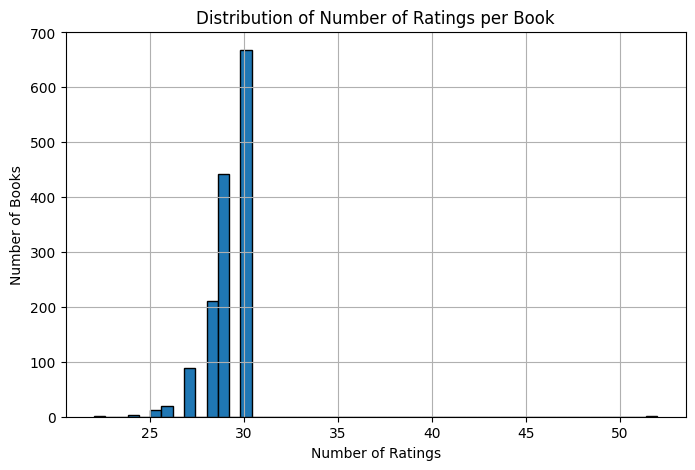

In [38]:
# Assuming you have ratings_per_title from earlier
plt.figure(figsize=(8, 5))
plt.hist(ratings_per_title['num_ratings'], bins=50, edgecolor='k')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Books')
plt.title('Distribution of Number of Ratings per Book')
plt.grid(True)
plt.show()

In [13]:
user_reviews.title.nunique()

1448

In [15]:
user_reviews.user_id.nunique()

14631

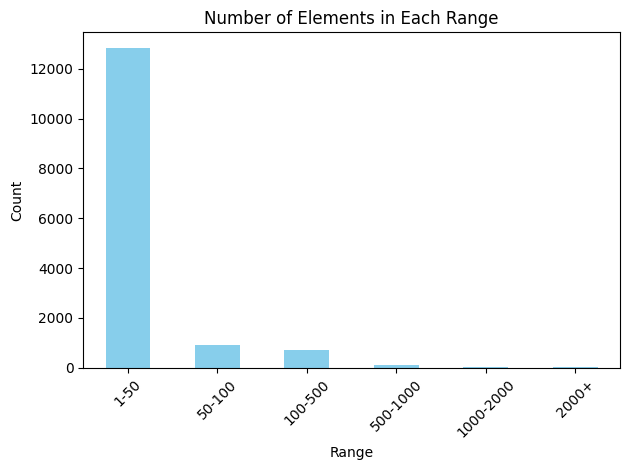

In [11]:
def plot_value_counts_in_ranges(series):
    # Define the ranges
    bins = [1, 50, 100, 500, 1000, 2000, float('inf')]
    labels = ['1-50', '50-100', '100-500', '500-1000', '1000-2000', '2000+']
    
    # Cut the series into bins
    binned_series = pd.cut(series, bins=bins, labels=labels, right=False)

    # Get the count of each bin
    binned_counts = binned_series.value_counts().sort_index()

    # Plot the bar chart
    binned_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Elements in Each Range')
    plt.xlabel('Range')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_value_counts_in_ranges(user_reviews.user_id.value_counts())

### User item matrix

In [16]:
# Step 1: If duplicates exist for (user_id, title), we must fix them (e.g., by averaging)
user_reviews_grouped = user_reviews.groupby(['user_id', 'title'])['rating'].mean().reset_index()

# Step 2: Pivot the table
user_item_matrix = user_reviews_grouped.pivot(index='user_id', columns='title', values='rating')

# Step 3: Fill missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

In [17]:
user_item_matrix

title,"""Surely You're Joking, Mr. Feynman!"": Adventures of a Curious Character","1,000 Places to See Before You Die: A Traveler's Life List",10% Happier,101 Essays That Will Change The Way You Think,12 Rules for Life: An Antidote to Chaos,1491: New Revelations of the Americas Before Columbus,1776,1984,2001: A Space Odyssey,A Clash of Kings,...,チェンソーマン 4 [Chainsaw Man 4],チェンソーマン 5 [Chainsaw Man 5],ハイキュー!! 1 [Haikyū!! 1],呪術廻戦 0 東京都立呪術高等専門学校 [Jujutsu Kaisen 0 Tōkyō Toritsu Jujutsu Kōtō Senmon Gakkō],呪術廻戦 1 [Jujutsu Kaisen 1],呪術廻戦 4 [Jujutsu Kaisen 4],東京喰種トーキョーグール 2,東京喰種トーキョーグール 3,東京喰種トーキョーグール 4 [Tokyo Guru 4],進撃の巨人 8 [Shingeki no Kyojin 8]
user_id,,,,,,,,,,,,,,,,,,,,,
1-otis-chandler,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001905-lynn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100019622-vonda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100022104-jasmine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000430-bonnie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991498-candice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999171-anita,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99920177-janet-roger,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
user_item_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14631 entries, 1-otis-chandler to 999522-alaina
Columns: 1448 entries, "Surely You're Joking, Mr. Feynman!": Adventures of a Curious Character to 進撃の巨人 8 [Shingeki no Kyojin 8]
dtypes: float64(1448)
memory usage: 161.7+ MB
